# 빅데이터마이닝 [2] 분석과 예측
## 2031634 통계학과 노혜림


## package import (eda, preprocessing) 

In [ ]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn
import mglearn

%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

     |████████████████████████████████| 542kB 28.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=6e8d928a337f10c2030478ac88e6d58d7e90a3860263a1dd54eac85c90923251
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/21-1/data/')

## 데이터 로드

In [ ]:
pop = pd.read_csv('./ANALYSIS_DATASET_FINAL0613.csv')

display(pop.head())
display(pop.describe())

,PERSON_ID,HTN_DT,CVD_DT,BMI,TOT_CHOLE,SMK_STAT_TYPE_RSPS_CD,DRNK_HABIT_RSPS_CD,SEX,AGE,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,outcome,SICK_S8,SICK_Q8,SICK_T2,SICK_G3,SICK_D0,SICK_R3,SICK_J8,SICK_N7,SICK_S7,SICK_Q5,SICK_K7,SICK_M6,SICK_D8,SICK_S9,SICK_N1,SICK_S4,SICK_N0,SICK_J0,SICK_J7,SICK_E0,SICK_E4,SICK_E2,SICK_F3,SICK_J3,SICK_N8,SICK_T3,SICK_G2,SICK_D7,...,DRUG_J01F,DRUG_V09C,DRUG_D11A,DRUG_R03B,DRUG_V03A,DRUG_J01A,DRUG_L01B,DRUG_N05C,DRUG_A07F,DRUG_H02A,DRUG_C04A,DRUG_H03B,DRUG_R05,DRUG_M09A,DRUG_V08B,DRUG_B03B,DRUG_B02A,DRUG_G04B,DRUG_B05A,DRUG_G03D,DRUG_A11D,DRUG_L02B,DRUG_M01C,DRUG_N02A,DRUG_G03G,DRUG_C10A,DRUG_J01G,DRUG_A03C,DRUG_C07C,DRUG_L01D,DRUG_B03A,DRUG_N07C,DRUG_L04A,DRUG_C09A,DRUG_A06A,DRUG_D08A,DRUG_C01E,DRUG_N07A,DRUG_A03B,DRUG_N03A
0,10221780,2009-11-05,.,21.83,135.0,1,1,1,81,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10244375,2009-05-06,2011-07-04,18.81,210.0,1,1,2,81,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10257488,2005-11-10,.,24.00,270.0,1,1,2,80,1,2,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,10258046,2008-12-01,.,24.06,263.0,1,1,2,80,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10259027,2009-10-13,.,20.41,147.0,1,1,2,80,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,PERSON_ID,BMI,TOT_CHOLE,SMK_STAT_TYPE_RSPS_CD,DRNK_HABIT_RSPS_CD,SEX,AGE,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,outcome,SICK_S8,SICK_Q8,SICK_T2,SICK_G3,SICK_D0,SICK_R3,SICK_J8,SICK_N7,SICK_S7,SICK_Q5,SICK_K7,SICK_M6,SICK_D8,SICK_S9,SICK_N1,SICK_S4,SICK_N0,SICK_J0,SICK_J7,SICK_E0,SICK_E4,SICK_E2,SICK_F3,SICK_J3,SICK_N8,SICK_T3,SICK_G2,SICK_D7,SICK_N4,SICK_E1,...,DRUG_J01F,DRUG_V09C,DRUG_D11A,DRUG_R03B,DRUG_V03A,DRUG_J01A,DRUG_L01B,DRUG_N05C,DRUG_A07F,DRUG_H02A,DRUG_C04A,DRUG_H03B,DRUG_R05,DRUG_M09A,DRUG_V08B,DRUG_B03B,DRUG_B02A,DRUG_G04B,DRUG_B05A,DRUG_G03D,DRUG_A11D,DRUG_L02B,DRUG_M01C,DRUG_N02A,DRUG_G03G,DRUG_C10A,DRUG_J01G,DRUG_A03C,DRUG_C07C,DRUG_L01D,DRUG_B03A,DRUG_N07C,DRUG_L04A,DRUG_C09A,DRUG_A06A,DRUG_D08A,DRUG_C01E,DRUG_N07A,DRUG_A03B,DRUG_N03A
count,2.991000e+03,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,...,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000
mean,5.556175e+07,24.181919,201.580508,1.630558,1.968572,1.343363,54.232029,4.213307,6.614176,0.125042,0.097626,0.000669,0.023069,0.002006,0.005684,0.064193,0.004346,0.083584,0.039786,0.000334,0.216650,0.154129,0.000334,0.100301,0.025075,0.095620,0.024741,0.488131,0.000334,0.070879,0.001337,0.005349,0.060181,0.381143,0.028084,0.006018,0.017051,0.003009,0.160816,0.148445,...,0.212304,0.001003,0.005684,0.000334,0.005349,0.089268,0.004681,0.074557,0.273153,0.434972,0.097626,0.007021,0.239385,0.458709,0.020395,0.043464,0.025075,0.087596,0.017385,0.010699,0.006687,0.000334,0.000669,0.108659,0.000334,0.148445,0.277165,0.005349,0.014042,0.000334,0.013373,0.042126,0.003343,0.070545,0.134403,0.001337,0.051488,0.016717,0.146774,0.114677
std,2.470336e+07,2.910667,37.499748,0.861431,1.209086,0.474911,9.031883,1.850419,3.018935,0.330822,0.296858,0.025854,0.150148,0.044751,0.075188,0.245137,0.065795,0.276809,0.195489,0.018285,0.412031,0.361133,0.018285,0.300451,0.156380,0.294119,0.155360,0.499943,0.018285,0.256666,0.036551,0.072956,0.237861,0.485749,0.165241,0.077355,0.129484,0.054781,0.367422,0.355600,...,0.409007,0.031660,0.075188,0.018285,0.072956,0.285178,0.068267,0.262719,0.445653,0.495836,0.296858,0.083511,0.426779,0.498375,0.141369,0.203933,0.156380,0.282754,0.130725,0.102897,0.081512,0.018285,0.025854,0.311263,0.018285,0.355600,0.447673,0.072956,0.117684,0.018285,0.114887,0.200911,0.057735,0.256106,0.341142,0.036551,0.221027,0.128230,0.353939,0.318685
min,1.022178e+07,14.270000,96.000000,1.000000,1.000000,1.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.608324e+07,22.200000,176.000000,1.000000,1.000000,1.000000,47.00

## Outcome 분포

0    2617
1     374
Name: outcome, dtype: int64


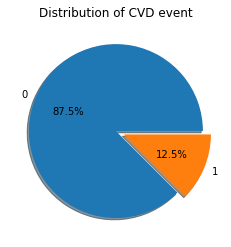

In [ ]:
print(pop['outcome'].value_counts())
pop['outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Distribution of CVD event')
plt.ylabel('')
plt.show()

## 변수 확인

In [ ]:
# min_max scale
from sklearn.preprocessing import MinMaxScaler
pop_conti = pop[['AGE', 'BMI', 'TOT_CHOLE']]

# MinMaxScaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
pop_conti_scaled = scaler.fit_transform(pop_conti)
conti_scaled_df = pd.DataFrame(pop_conti_scaled, columns = ['AGE_scaled', 'BMI_scaled', 'CHOLE_scaled'])
conti_scaled_df.index = pop_conti.index
conti_scaled_df.head()

,AGE_scaled,BMI_scaled,CHOLE_scaled
0,1.000000,0.233622,0.138790
1,1.000000,0.140297,0.405694
2,0.974359,0.300680,0.619217
3,0.974359,0.302534,0.594306
4,0.974359,0.189740,0.181495


In [ ]:
pop[['AGE', 'BMI', 'TOT_CHOLE']] = conti_scaled_df[['AGE_scaled', 'BMI_scaled', 'CHOLE_scaled']]
pop.head()

,PERSON_ID,HTN_DT,CVD_DT,BMI,TOT_CHOLE,SMK_STAT_TYPE_RSPS_CD,DRNK_HABIT_RSPS_CD,SEX,AGE,IPSN_TYPE_CD,CTRB_PT_TYPE_CD,outcome,SICK_S8,SICK_Q8,SICK_T2,SICK_G3,SICK_D0,SICK_R3,SICK_J8,SICK_N7,SICK_S7,SICK_Q5,SICK_K7,SICK_M6,SICK_D8,SICK_S9,SICK_N1,SICK_S4,SICK_N0,SICK_J0,SICK_J7,SICK_E0,SICK_E4,SICK_E2,SICK_F3,SICK_J3,SICK_N8,SICK_T3,SICK_G2,SICK_D7,...,DRUG_J01F,DRUG_V09C,DRUG_D11A,DRUG_R03B,DRUG_V03A,DRUG_J01A,DRUG_L01B,DRUG_N05C,DRUG_A07F,DRUG_H02A,DRUG_C04A,DRUG_H03B,DRUG_R05,DRUG_M09A,DRUG_V08B,DRUG_B03B,DRUG_B02A,DRUG_G04B,DRUG_B05A,DRUG_G03D,DRUG_A11D,DRUG_L02B,DRUG_M01C,DRUG_N02A,DRUG_G03G,DRUG_C10A,DRUG_J01G,DRUG_A03C,DRUG_C07C,DRUG_L01D,DRUG_B03A,DRUG_N07C,DRUG_L04A,DRUG_C09A,DRUG_A06A,DRUG_D08A,DRUG_C01E,DRUG_N07A,DRUG_A03B,DRUG_N03A
0,10221780,2009-11-05,.,0.233622,0.138790,1,1,1,1.000000,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10244375,2009-05-06,2011-07-04,0.140297,0.405694,1,1,2,1.000000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10257488,2005-11-10,.,0.300680,0.619217,1,1,2,0.974359,1,2,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,10258046,2008-12-01,.,0.302534,0.594306,1,1,2,0.974359,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10259027,2009-10-13,.,0.189740,0.181495,1,1,2,0.974359,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Encoding

In [ ]:
# SMOKING 기준 None
# pop['SMK_NONE'] = 1*(pop['SMK_STAT_TYPE_RSPS_CD'] == 1)
pop['SMK_PAST'] = 1*(pop['SMK_STAT_TYPE_RSPS_CD'] == 2)
pop['SMK_CURRENT'] = 1*(pop['SMK_STAT_TYPE_RSPS_CD'] == 3)

# DRINK
pop['DRNK'] = 1*(pop['DRNK_HABIT_RSPS_CD']!=1)

# Medical AID
pop['MedicalAID'] = 1*( (pop['IPSN_TYPE_CD'] == 7) | (pop['IPSN_TYPE_CD'] == 8) )

# INCOME
pop['INCOMELOWER'] = 1*( (pop['CTRB_PT_TYPE_CD'] == 0) | (pop['CTRB_PT_TYPE_CD'] == 1) )

# DROP
pop2 = pop.drop(['SMK_STAT_TYPE_RSPS_CD', 'DRNK_HABIT_RSPS_CD', 'IPSN_TYPE_CD', 'CTRB_PT_TYPE_CD', 'HTN_DT', 'CVD_DT'], axis=1)
pop2.head()

,PERSON_ID,BMI,TOT_CHOLE,SEX,AGE,outcome,SICK_S8,SICK_Q8,SICK_T2,SICK_G3,SICK_D0,SICK_R3,SICK_J8,SICK_N7,SICK_S7,SICK_Q5,SICK_K7,SICK_M6,SICK_D8,SICK_S9,SICK_N1,SICK_S4,SICK_N0,SICK_J0,SICK_J7,SICK_E0,SICK_E4,SICK_E2,SICK_F3,SICK_J3,SICK_N8,SICK_T3,SICK_G2,SICK_D7,SICK_N4,SICK_E1,SICK_Q2,SICK_K1,SICK_F4,SICK_D5,...,DRUG_J01A,DRUG_L01B,DRUG_N05C,DRUG_A07F,DRUG_H02A,DRUG_C04A,DRUG_H03B,DRUG_R05,DRUG_M09A,DRUG_V08B,DRUG_B03B,DRUG_B02A,DRUG_G04B,DRUG_B05A,DRUG_G03D,DRUG_A11D,DRUG_L02B,DRUG_M01C,DRUG_N02A,DRUG_G03G,DRUG_C10A,DRUG_J01G,DRUG_A03C,DRUG_C07C,DRUG_L01D,DRUG_B03A,DRUG_N07C,DRUG_L04A,DRUG_C09A,DRUG_A06A,DRUG_D08A,DRUG_C01E,DRUG_N07A,DRUG_A03B,DRUG_N03A,SMK_PAST,SMK_CURRENT,DRNK,MedicalAID,INCOMELOWER
0,10221780,0.233622,0.138790,1,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10244375,0.140297,0.405694,2,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,10257488,0.300680,0.619217,2,0.974359,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,10258046,0.302534,0.594306,2,0.974359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10259027,0.189740,0.181495,2,0.974359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Smoking Status')

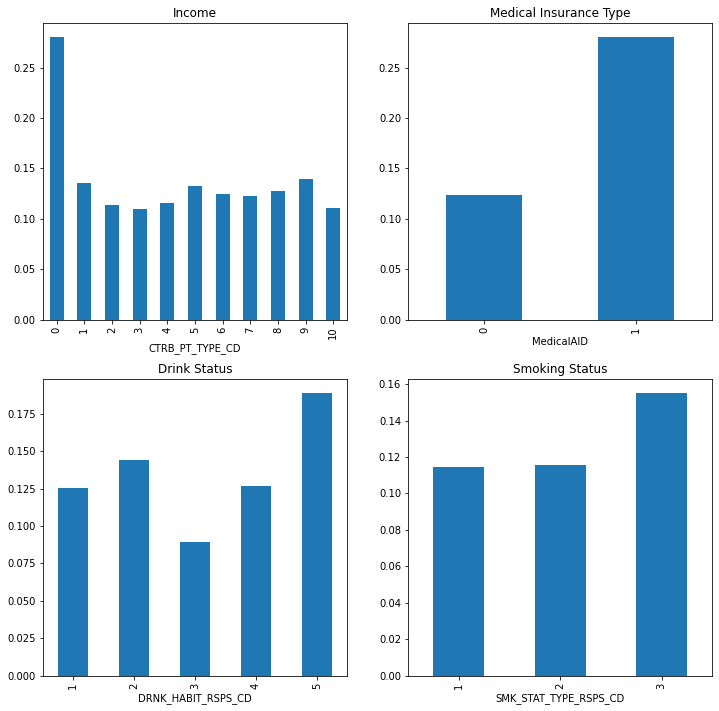

In [ ]:
f,ax=plt.subplots(2,2,figsize=(12, 12))
pop.groupby('CTRB_PT_TYPE_CD')['outcome'].mean().plot.bar(ax=ax[0,0])
ax[0,0].set_title('Income')

pop.groupby('MedicalAID')['outcome'].mean().plot.bar(ax=ax[0,1])
ax[0,1].set_title('Medical Insurance Type')

pop.groupby('DRNK_HABIT_RSPS_CD')['outcome'].mean().plot.bar(ax=ax[1,0])
ax[1,0].set_title('Drink Status')

pop.groupby('SMK_STAT_TYPE_RSPS_CD')['outcome'].mean().plot.bar(ax=ax[1,1])
ax[1,1].set_title('Smoking Status')

## 모형 적합 - 개별 적합

### 0.1 package import (model fit and model eval)


In [ ]:
# data split
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

# model
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.linear_model import Lasso #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import GradientBoostingClassifier # GB

# tree visualization
from sklearn.tree import export_graphviz
import graphviz

# 5-cv
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

import warnings
warnings.filterwarnings(action='ignore')

### 0.2 Data split

In [ ]:
# 이 외로 처치 코드 중 AA : 치과 관련 / AL : 재진 등의 일상적으로 흔히 사용되는 처치 코드 추가 제외.
X = pop2.drop(['PERSON_ID', 'outcome', 'PROC_AA', 'PROC_AL', 'PROC_KK', 'PROC_AB', 'PROC_MM', 'DRUG_M01A', 'PROC_C3', 'PROC_K2'], axis=1)
print(X.shape)
display(X.head())
y = pop['outcome']

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)

(2991, 490)


,BMI,TOT_CHOLE,SEX,AGE,SICK_S8,SICK_Q8,SICK_T2,SICK_G3,SICK_D0,SICK_R3,SICK_J8,SICK_N7,SICK_S7,SICK_Q5,SICK_K7,SICK_M6,SICK_D8,SICK_S9,SICK_N1,SICK_S4,SICK_N0,SICK_J0,SICK_J7,SICK_E0,SICK_E4,SICK_E2,SICK_F3,SICK_J3,SICK_N8,SICK_T3,SICK_G2,SICK_D7,SICK_N4,SICK_E1,SICK_Q2,SICK_K1,SICK_F4,SICK_D5,SICK_H8,SICK_R6,...,DRUG_J01A,DRUG_L01B,DRUG_N05C,DRUG_A07F,DRUG_H02A,DRUG_C04A,DRUG_H03B,DRUG_R05,DRUG_M09A,DRUG_V08B,DRUG_B03B,DRUG_B02A,DRUG_G04B,DRUG_B05A,DRUG_G03D,DRUG_A11D,DRUG_L02B,DRUG_M01C,DRUG_N02A,DRUG_G03G,DRUG_C10A,DRUG_J01G,DRUG_A03C,DRUG_C07C,DRUG_L01D,DRUG_B03A,DRUG_N07C,DRUG_L04A,DRUG_C09A,DRUG_A06A,DRUG_D08A,DRUG_C01E,DRUG_N07A,DRUG_A03B,DRUG_N03A,SMK_PAST,SMK_CURRENT,DRNK,MedicalAID,INCOMELOWER
0,0.233622,0.138790,1,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.140297,0.405694,2,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.300680,0.619217,2,0.974359,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.302534,0.594306,2,0.974359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.189740,0.181495,2,0.974359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(2093, 490)
(898, 490)


In [ ]:
pred_naive = [0 for i in range(len(y_test))]

print('The accuracy of the Naive-benchmark is', metrics.accuracy_score(pred_naive, y_test))
print('The precision of the Naive-benchmark is', metrics.precision_score(pred_naive, y_test))
print('The recall of the Naive-benchmark is', metrics.recall_score(pred_naive, y_test))
print('The f1-score of the Naive-benchmark is', metrics.f1_score(pred_naive, y_test))

The accuracy of the Naive-benchmark is 0.89086859688196
The precision of the Naive-benchmark is 0.0
The recall of the Naive-benchmark is 0.0
The f1-score of the Naive-benchmark is 0.0


### 0.3. 클래스 가중치 계산

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weight = {0: 2991/2667,
          1: 2991/374}
print(weight)

sample_wt = 2991 * ( (y_train==1) * (1/374) + (y_train==0) * (1/2667) )
print(sample_wt)

{0: 1.1214848143982001, 1: 7.997326203208556}
2727    1.121485
954     1.121485
2285    1.121485
1503    1.121485
846     1.121485
          ...   
2763    1.121485
905     7.997326
1096    1.121485
235     1.121485
1061    1.121485
Name: outcome, Length: 2093, dtype: float64


### 1.1. Logistic Regression

In [ ]:
acc = []
pre = []
rec = []
f1 = []

In [ ]:
LR1 = LogisticRegression(penalty='l1', solver='liblinear')
LR1.fit(X_train, y_train)
predLR1=LR1.predict(X_test)

print('The accuracy of the Logistic Regression is', metrics.accuracy_score(predLR1, y_test))
print('The precision of the Logistic Regression is', metrics.precision_score(predLR1, y_test))
print('The recall of the Logistic Regression is', metrics.recall_score(predLR1, y_test))
print('The f1-score of the Logistic Regression is', metrics.f1_score(predLR1, y_test))

acc.append(metrics.accuracy_score(predLR1, y_test))
pre.append(metrics.precision_score(predLR1, y_test))
rec.append(metrics.recall_score(predLR1, y_test))
f1.append(metrics.f1_score(predLR1, y_test))

The accuracy of the Logistic Regression is 0.8819599109131403
The precision of the Logistic Regression is 0.20408163265306123
The recall of the Logistic Regression is 0.4166666666666667
The f1-score of the Logistic Regression is 0.273972602739726


In [ ]:
confusion_matrix(predLR1, y_test, labels=[0,1])

array([[772,  78],
       [ 28,  20]])

In [ ]:
LR_coef = pd.DataFrame(abs(LR1.coef_.reshape(-1)), index=X_test.columns)
LR_coef30 = LR_coef.sort_values(by=[0], axis=0).tail(30)
print(LR_coef30)

                    0
PROC_HG      0.000000
PROC_C8      0.000000
PROC_E2      0.000000
PROC_A4      0.000000
PROC_K4      0.000000
PROC_C5      0.000000
PROC_FA      0.000000
PROC_HF      0.000000
PROC_A3      0.000000
PROC_G8      0.000000
PROC_12      0.000000
DRUG_A03C    0.000000
SMK_PAST     0.040157
INCOMELOWER  0.056613
PROC_C2      0.098299
DRNK         0.098482
DRUG_N05B    0.184628
SEX          0.258827
TOT_CHOLE    0.320233
SMK_CURRENT  0.327895
DRUG_R06A    0.687384
DRUG_A02B    0.809741
DRUG_A03F    0.823386
MedicalAID   0.869596
SICK_J0      0.872873
PROC_B0      0.883583
PROC_E6      1.385476
SICK_I1      1.899795
BMI          2.015196
AGE          3.266111


### 1.2. Logistic Regression w. Weight 

In [ ]:
LR2 = LogisticRegression(penalty='l1', solver='liblinear', class_weight=weight)
LR2.fit(X_train, y_train)
predLR2=LR2.predict(X_test)

print('The accuracy of the Logistic Regression is', metrics.accuracy_score(predLR2, y_test))
print('The precision of the Logistic Regression is', metrics.precision_score(predLR2, y_test))
print('The recall of the Logistic Regression is', metrics.recall_score(predLR2, y_test))
print('The f1-score of the Logistic Regression is', metrics.f1_score(predLR2, y_test))

acc.append(metrics.accuracy_score(predLR2, y_test))
pre.append(metrics.precision_score(predLR2, y_test))
rec.append(metrics.recall_score(predLR2, y_test))
f1.append(metrics.f1_score(predLR2, y_test))

The accuracy of the Logistic Regression is 0.7149220489977728
The precision of the Logistic Regression is 0.9081632653061225
The recall of the Logistic Regression is 0.2648809523809524
The f1-score of the Logistic Regression is 0.4101382488479263


In [ ]:
confusion_matrix(predLR2, y_test, labels=[0,1])

array([[553,   9],
       [247,  89]])

In [ ]:
LR_coef = pd.DataFrame(abs(LR2.coef_.reshape(-1)), index=X_test.columns)
LR_coef30 = LR_coef.sort_values(by=[0], axis=0).tail(30)
print(LR_coef30)

                    0
PROC_A4      0.000000
PROC_K4      0.000000
PROC_C5      0.000000
PROC_FA      0.000000
PROC_HF      0.000000
PROC_A3      0.000000
PROC_G8      0.000000
PROC_Y1      0.000000
PROC_X5      0.000000
DRUG_G03G    0.000000
INCOMELOWER  0.026848
PROC_C2      0.054081
DRUG_J01D    0.069976
DRUG_M09A    0.177736
DRNK         0.196701
SMK_PAST     0.204156
TOT_CHOLE    0.214196
SEX          0.323899
SMK_CURRENT  0.374235
DRUG_A02B    0.651228
DRUG_N05B    0.663215
DRUG_R06A    0.689611
MedicalAID   1.116987
DRUG_A03F    1.248479
PROC_B0      1.282224
SICK_J0      1.394913
PROC_E6      1.673252
SICK_I1      3.351261
BMI          3.543452
AGE          3.703523


### 2.1. KNN

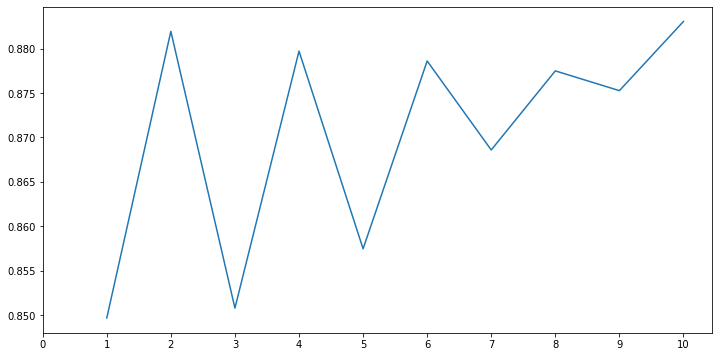

Accuracies for different values of n are: [0.84966592 0.88195991 0.85077951 0.87973274 0.85746102 0.87861915
 0.86859688 0.87750557 0.8752784  0.8830735 ] with the max value as  0.8830734966592427


In [ ]:
# k 선택 --> accuracy 와 f1 score 고려하여 4로 선택
a_index=list(range(1,11))
a=pd.Series()
f=pd.Series()

x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
    f=f.append(pd.Series(metrics.f1_score(prediction, y_test)))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

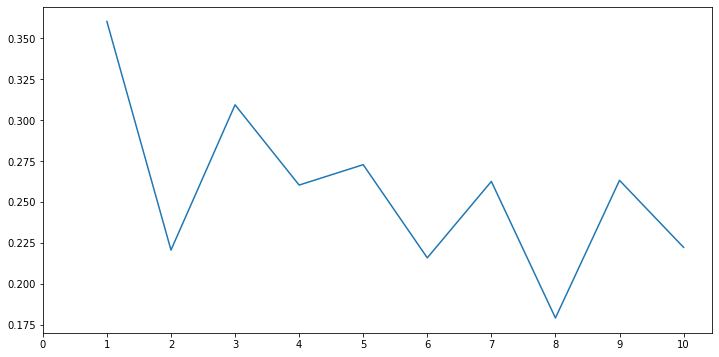

f1-score for different values of n are: [0.36018957 0.22058824 0.30927835 0.26027397 0.27272727 0.21582734
 0.2625     0.17910448 0.26315789 0.22222222] with the max value as  0.36018957345971564


In [ ]:
plt.plot(a_index, f)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('f1-score for different values of n are:',f.values,'with the max value as ',f.values.max())

In [ ]:
# weight 적용불가 (제외)
KNN=KNeighborsClassifier(4)
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(predKNN,y_test))
print('The precision of the KNN is', metrics.precision_score(predKNN, y_test))
print('The recall of the KNN is', metrics.recall_score(predKNN, y_test))
print('The f1-score of the KNN is', metrics.f1_score(predKNN, y_test))

acc.append(metrics.accuracy_score(predKNN, y_test))
pre.append(metrics.precision_score(predKNN, y_test))
rec.append(metrics.recall_score(predKNN, y_test))
f1.append(metrics.f1_score(predKNN, y_test))

The accuracy of the KNN is 0.8797327394209354
The precision of the KNN is 0.19387755102040816
The recall of the KNN is 0.3958333333333333
The f1-score of the KNN is 0.2602739726027397


### 3.1 SVM (kernel = Linear)

In [ ]:
SVM1=svm.SVC(kernel='linear',C=1,gamma=0.1)
SVM1.fit(X_train, y_train)
predSVM1=SVM1.predict(X_test)

print('The accuracy of the Support Vector Machine is', metrics.accuracy_score(predSVM1, y_test))
print('The precision of the Support Vector Machine is', metrics.precision_score(predSVM1, y_test))
print('The recall of the Support Vector Machine is', metrics.recall_score(predSVM1, y_test))
print('The f1-score of the Support Vector Machine is', metrics.f1_score(predSVM1, y_test))

acc.append(metrics.accuracy_score(predSVM1, y_test))
pre.append(metrics.precision_score(predSVM1, y_test))
rec.append(metrics.recall_score(predSVM1, y_test))
f1.append(metrics.f1_score(predSVM1, y_test))

The accuracy of the Support Vector Machine is 0.8897550111358574
The precision of the Support Vector Machine is 0.02040816326530612
The recall of the Support Vector Machine is 0.4
The f1-score of the Support Vector Machine is 0.03883495145631067


In [ ]:
confusion_matrix(predSVM1, y_test, labels=[0,1])

array([[797,  96],
       [  3,   2]])

### 3.2 SVM (kernel=Linear) w. Weight

In [ ]:
SVM2=svm.SVC(kernel='linear',C=1,gamma=0.1, class_weight=weight)
SVM2.fit(X_train, y_train)
predSVM2=SVM2.predict(X_test)

print('The accuracy of the Support Vector Machine is', metrics.accuracy_score(predSVM2, y_test))
print('The precision of the Support Vector Machine is', metrics.precision_score(predSVM2, y_test))
print('The recall of the Support Vector Machine is', metrics.recall_score(predSVM2, y_test))
print('The f1-score of the Support Vector Machine is', metrics.f1_score(predSVM2, y_test))

acc.append(metrics.accuracy_score(predSVM2, y_test))
pre.append(metrics.precision_score(predSVM2, y_test))
rec.append(metrics.recall_score(predSVM2, y_test))
f1.append(metrics.f1_score(predSVM2, y_test))

The accuracy of the Support Vector Machine is 0.6614699331848553
The precision of the Support Vector Machine is 1.0
The recall of the Support Vector Machine is 0.24378109452736318
The f1-score of the Support Vector Machine is 0.392


In [ ]:
confusion_matrix(predSVM2, y_test, labels=[0,1])

array([[496,   0],
       [304,  98]])

### 4.1 DecisionTreeClassifier 

In [ ]:
DTree1= DecisionTreeClassifier(random_state=0, class_weight="balanced")
DTree1.fit(X_train, y_train)
predDTree1=DTree1.predict(X_test)

print('The accuracy of the Decision Tree is', metrics.accuracy_score(predDTree1, y_test))
print('The precision of the Decision Tree is', metrics.precision_score(predDTree1, y_test))
print('The recall of the Decision Tree is', metrics.recall_score(predDTree1, y_test))
print('The f1-score of the Decision Tree is', metrics.f1_score(predDTree1, y_test))

acc.append(metrics.accuracy_score(predDTree1, y_test))
pre.append(metrics.precision_score(predDTree1, y_test))
rec.append(metrics.recall_score(predDTree1, y_test))
f1.append(metrics.f1_score(predDTree1, y_test))

The accuracy of the Decision Tree is 0.8452115812917594
The precision of the Decision Tree is 0.29591836734693877
The recall of the Decision Tree is 0.29292929292929293
The f1-score of the Decision Tree is 0.29441624365482233


In [ ]:
confusion_matrix(predDTree1, y_test, labels=[0,1])

array([[730,  69],
       [ 70,  29]])

### 4.2. DecisionTreeClassifier w. Weight

In [ ]:
DTree2 = DecisionTreeClassifier(random_state=0, class_weight=weight)
DTree2.fit(X_train, y_train)
predDTree2=DTree2.predict(X_test)

print('The accuracy of the Decision Tree is', metrics.accuracy_score(predDTree2, y_test))
print('The precision of the Decision Tree is', metrics.precision_score(predDTree2, y_test))
print('The recall of the Decision Tree is', metrics.recall_score(predDTree2, y_test))
print('The f1-score of the Decision Tree is', metrics.f1_score(predDTree2, y_test))

acc.append(metrics.accuracy_score(predDTree2, y_test))
pre.append(metrics.precision_score(predDTree2, y_test))
rec.append(metrics.recall_score(predDTree2, y_test))
f1.append(metrics.f1_score(predDTree2, y_test))

The accuracy of the Decision Tree is 0.8485523385300668
The precision of the Decision Tree is 0.35714285714285715
The recall of the Decision Tree is 0.32407407407407407
The f1-score of the Decision Tree is 0.33980582524271846


In [ ]:
confusion_matrix(predDTree2, y_test, labels=[0,1])

array([[727,  63],
       [ 73,  35]])

### 5.1 Random Forest

In [ ]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
RF1= RandomForestClassifier(n_estimators=500, random_state=0)  
RF1.fit(X_train, y_train)
predRF1=RF1.predict(X_test)

print('The accuracy of the Random Forest is', metrics.accuracy_score(predRF1, y_test))
print('The precision of the Random Forest is', metrics.precision_score(predRF1, y_test))
print('The recall of the Random Forest is', metrics.recall_score(predRF1, y_test))
print('The f1-score of the Random Forest is', metrics.f1_score(predRF1, y_test))
print('The ROC-AUC of the Random Forest is', metrics.roc_auc_score(predRF1, y_test))

acc.append(metrics.accuracy_score(predRF1, y_test))
pre.append(metrics.precision_score(predRF1, y_test))
rec.append(metrics.recall_score(predRF1, y_test))
f1.append(metrics.f1_score(predRF1, y_test))

The accuracy of the Random Forest is 0.8719376391982183
The precision of the Random Forest is 0.23469387755102042
The recall of the Random Forest is 0.36507936507936506
The f1-score of the Random Forest is 0.28571428571428575
The ROC-AUC of the Random Forest is 0.637629502898964


In [ ]:
confusion_matrix(predRF1, y_test, labels=[0,1])

array([[760,  75],
       [ 40,  23]])

                    0
PROC_C4      0.003176
DRUG_M03B    0.003508
DRUG_A02A    0.003965
DRUG_N05B    0.004317
PROC_B1      0.004423
MedicalAID   0.004602
DRUG_A03A    0.004630
DRUG_J01D    0.004672
PROC_G2      0.005482
DRUG_R05C    0.005756
PROC_C2      0.005916
SICK_K2      0.006194
DRUG_H02A    0.006313
PROC_B2      0.006637
DRUG_M09A    0.006727
SICK_I1      0.006785
PROC_B0      0.007120
DRUG_A03F    0.008705
SMK_PAST     0.009853
INCOMELOWER  0.010550
DRUG_A02B    0.010580
SICK_J0      0.010672
DRUG_R06A    0.010807
PROC_E6      0.011610
SEX          0.013216
SMK_CURRENT  0.014339
DRNK         0.017321
TOT_CHOLE    0.247547
AGE          0.248647
BMI          0.252276


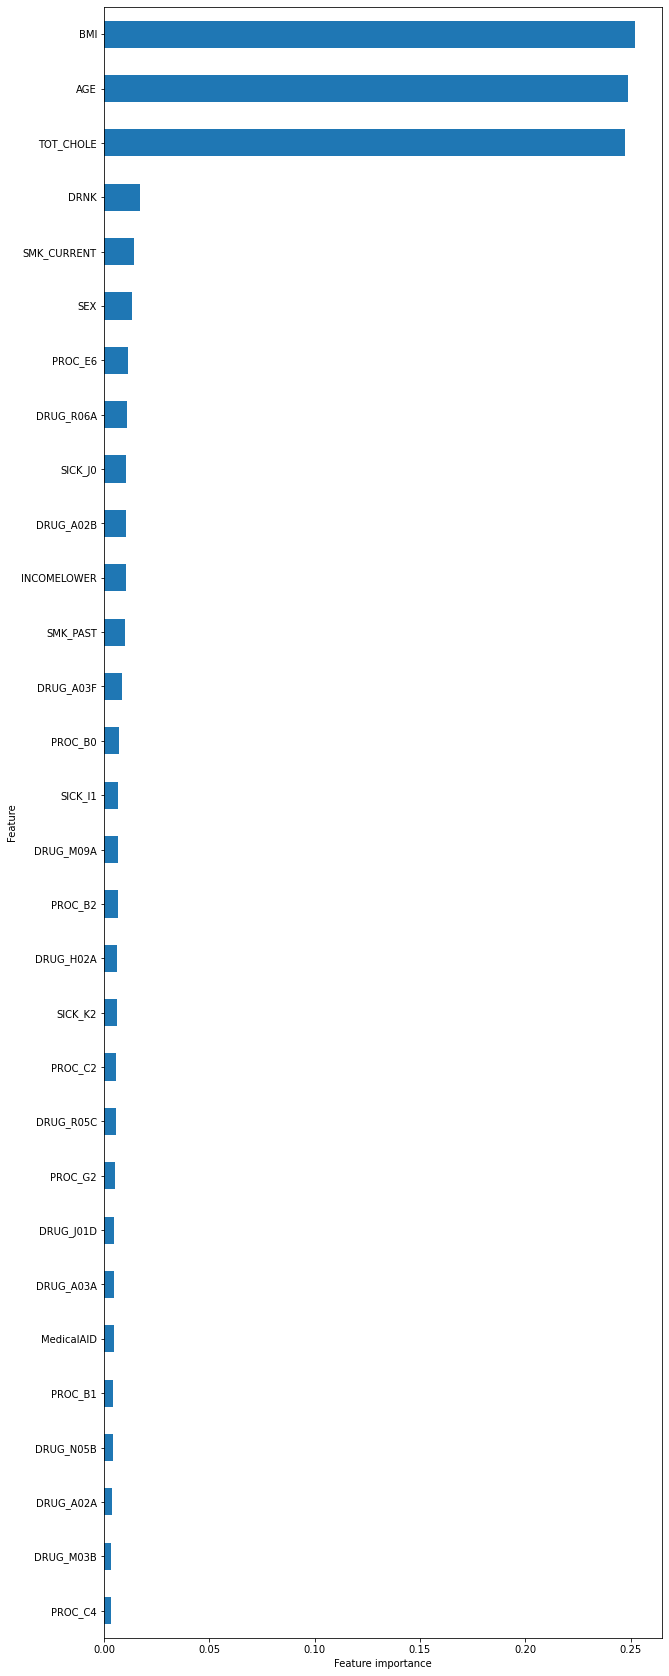

In [ ]:
feature_importance = RF1.feature_importances_
RF_VIP = pd.DataFrame(feature_importance, index=X_test.columns)
RF_VIP30 = RF_VIP.sort_values(by=[0], axis=0).tail(30)
print(RF_VIP30)

plt.figure(figsize=(10, 30))
RF_VIP30[0].plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

### 5.2 Random Forest w. Weight

In [ ]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
RF2= RandomForestClassifier(n_estimators=500, random_state=0, class_weight=weight)  
RF2.fit(X_train, y_train)
predRF2=RF2.predict(X_test)

print('The accuracy of the Random Forest is', metrics.accuracy_score(predRF2, y_test))
print('The precision of the Random Forest is', metrics.precision_score(predRF2, y_test))
print('The recall of the Random Forest is', metrics.recall_score(predRF2, y_test))
print('The f1-score of the Random Forest is', metrics.f1_score(predRF2, y_test))
#print('The ROC-AUC of the Random Forest is', metrics.roc_auc_score(predRF2, y_test))

acc.append(metrics.accuracy_score(predRF2, y_test))
pre.append(metrics.precision_score(predRF2, y_test))
rec.append(metrics.recall_score(predRF2, y_test))
f1.append(metrics.f1_score(predRF2, y_test))

The accuracy of the Random Forest is 0.8775055679287305
The precision of the Random Forest is 0.23469387755102042
The recall of the Random Forest is 0.39655172413793105
The f1-score of the Random Forest is 0.2948717948717949


                    0
PROC_C2      0.005916
SICK_K2      0.006194
DRUG_H02A    0.006313
PROC_B2      0.006637
DRUG_M09A    0.006727
SICK_I1      0.006785
PROC_B0      0.007120
DRUG_A03F    0.008705
SMK_PAST     0.009853
INCOMELOWER  0.010550
DRUG_A02B    0.010580
SICK_J0      0.010672
DRUG_R06A    0.010807
PROC_E6      0.011610
SEX          0.013216
SMK_CURRENT  0.014339
DRNK         0.017321
TOT_CHOLE    0.247547
AGE          0.248647
BMI          0.252276


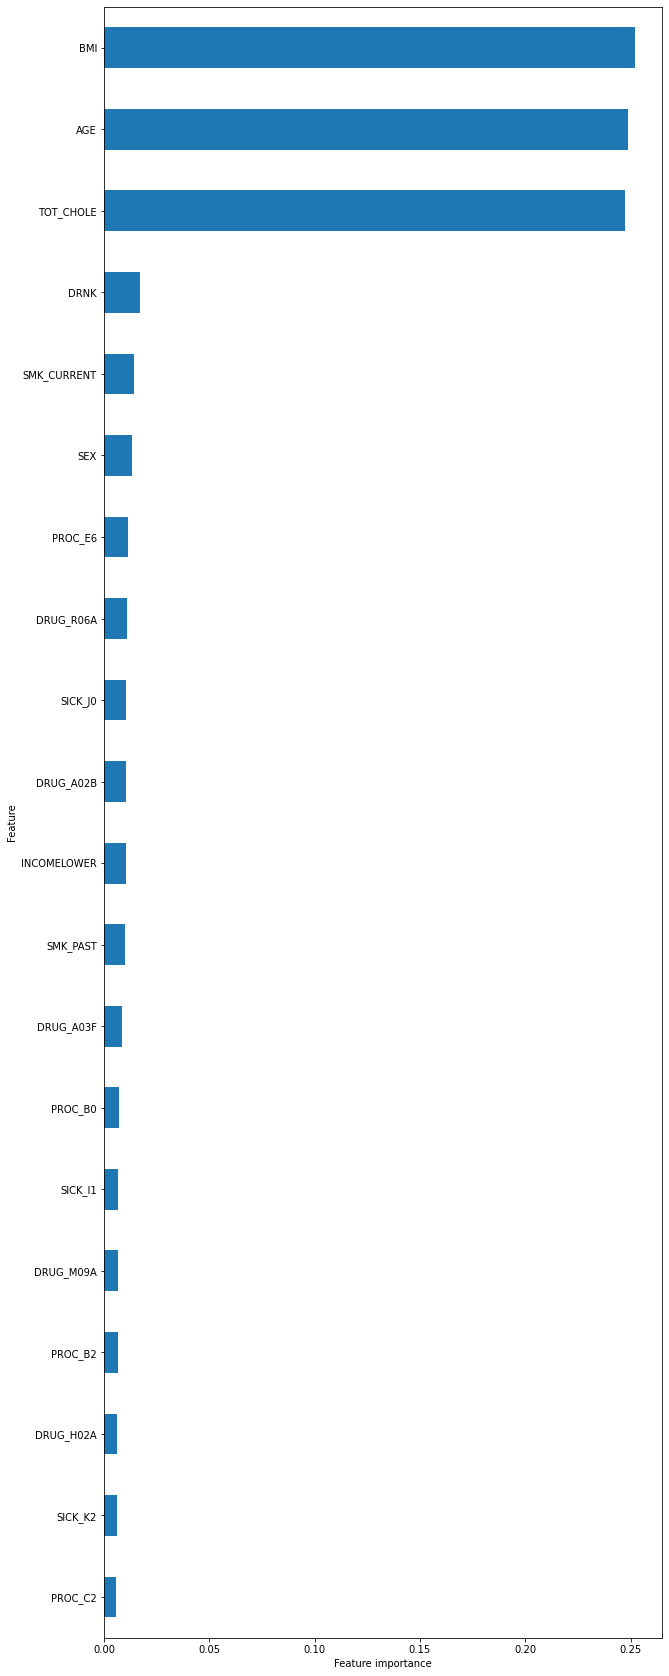

In [ ]:
feature_importance = RF1.feature_importances_
RF_VIP = pd.DataFrame(feature_importance, index=X_test.columns)
RF_VIP30 = RF_VIP.sort_values(by=[0], axis=0).tail(20)
print(RF_VIP30)

plt.figure(figsize=(10, 30))
RF_VIP30[0].plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
confusion_matrix(predRF2, y_test, labels=[0,1])

array([[765,  75],
       [ 35,  23]])

### 6.1 Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

f1_scoler = make_scorer(f1_score , average='macro')

param_rf = {'max_depth':[3,4,5], 'learning_rate':[0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]}

init_gbrt = GradientBoostingClassifier(random_state=0, n_estimators=500)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=param_rf, cv=5, refit=True,
                         scoring= f1_scoler )

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

# learning_rate 0.02, max_depth 3 에서 가장 좋은 성능을 보임.
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.08, 'max_depth': 5}
GridSearchCV 최고 정확도: 0.6289


In [ ]:
# weight 적용 불가
GBM= GradientBoostingClassifier(random_state=0, max_depth= 5, n_estimators=500, learning_rate = 0.08)
GBM.fit(X_train, y_train)
predGBM=GBM.predict(X_test)

print('The accuracy of the Gradient Boosting is', metrics.accuracy_score(predGBM, y_test))
print('The precision of the Gradient Boosting is', metrics.precision_score(predGBM, y_test))
print('The recall of the Gradient Boosting is', metrics.recall_score(predGBM, y_test))
print('The f1-score of the Gradient Boosting is', metrics.f1_score(predGBM, y_test))
#print('The ROC-AUC of the Gradient Boosting is', metrics.roc_auc_score(predGBM, y_test))

acc.append(metrics.accuracy_score(predGBM, y_test))
pre.append(metrics.precision_score(predGBM, y_test))
rec.append(metrics.recall_score(predGBM, y_test))
f1.append(metrics.f1_score(predGBM, y_test))

The accuracy of the Gradient Boosting is 0.8775055679287305
The precision of the Gradient Boosting is 0.30612244897959184
The recall of the Gradient Boosting is 0.4166666666666667
The f1-score of the Gradient Boosting is 0.35294117647058826


In [ ]:
confusion_matrix(predGBM, y_test, labels=[0,1])

array([[758,  68],
       [ 42,  30]])

                    0
SICK_K2      0.000881
SICK_N3      0.001001
DRUG_M03B    0.001116
DRUG_C08C    0.001177
DRUG_M02A    0.001194
DRUG_H02A    0.001306
SICK_M7      0.001515
DRUG_A02A    0.001777
DRUG_N05B    0.001803
DRUG_J01D    0.002104
DRUG_R05C    0.002227
PROC_B2      0.002336
PROC_C2      0.003212
PROC_B0      0.003304
DRUG_M09A    0.003882
MedicalAID   0.005283
SICK_J0      0.006442
DRUG_A03F    0.007616
DRUG_R06A    0.008173
SMK_PAST     0.008801
INCOMELOWER  0.012513
SICK_I1      0.013595
SEX          0.013715
SMK_CURRENT  0.019554
DRNK         0.019563
PROC_E6      0.044368
TOT_CHOLE    0.179930
DRUG_A02B    0.180786
AGE          0.211505
BMI          0.224320


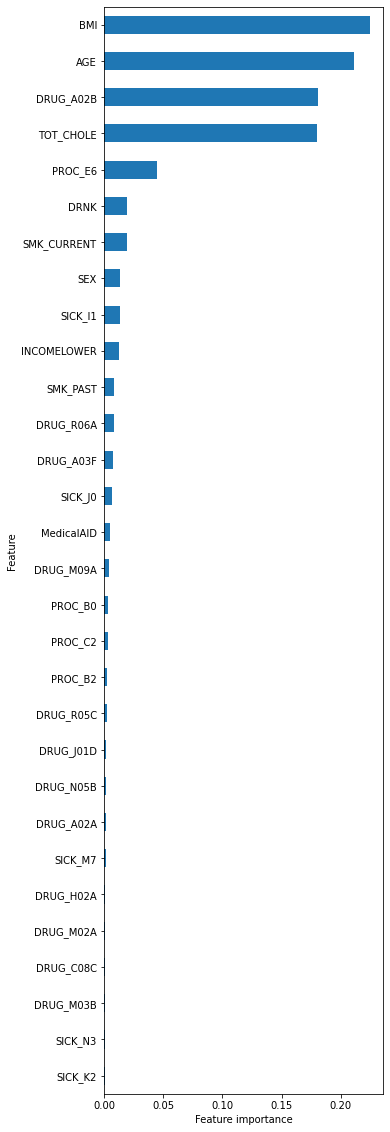

In [ ]:
feature_importance = GBM.feature_importances_
GB_VIP = pd.DataFrame(feature_importance, index=X_test.columns)
GB_VIP30 = GB_VIP.sort_values(by=[0], axis=0).tail(30)
print(GB_VIP30)

plt.figure(figsize=(5, 20))
GB_VIP30[0].plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

                    0
INCOMELOWER  0.012513
SICK_I1      0.013595
SEX          0.013715
SMK_CURRENT  0.019554
DRNK         0.019563
PROC_E6      0.044368
TOT_CHOLE    0.179930
DRUG_A02B    0.180786
AGE          0.211505
BMI          0.224320


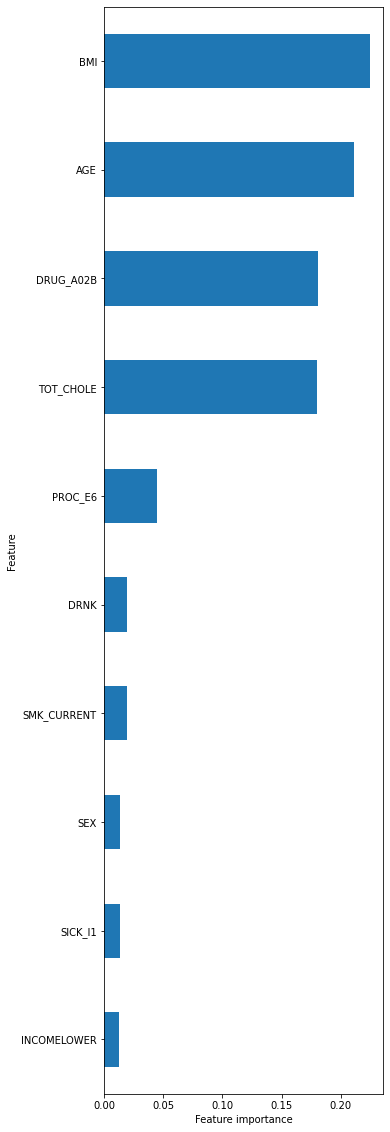

In [ ]:
GB_VIP10 = GB_VIP.sort_values(by=[0], axis=0).tail(10)
print(GB_VIP10)

plt.figure(figsize=(5, 20))
GB_VIP10[0].plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

### 6.2 Gradient Boosting w. Weight

In [ ]:
init_gbrt = GradientBoostingClassifier(random_state=0, n_estimators=500)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=param_rf, cv=5, refit=True,
                         scoring= f1_scoler )

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train, sample_weight = sample_wt)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

# learning_rate 0.02, max_depth 3 에서 가장 좋은 성능을 보임.
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.02, 'max_depth': 5}
GridSearchCV 최고 정확도: 0.6721


In [ ]:
# weight 적용 불가
GBM= GradientBoostingClassifier(random_state=0, max_depth= 5, n_estimators=500, learning_rate = 0.02)
GBM.fit(X_train, y_train, sample_weight = sample_wt)
predGBM=GBM.predict(X_test)

print('The accuracy of the Gradient Boosting is', metrics.accuracy_score(predGBM, y_test))
print('The precision of the Gradient Boosting is', metrics.precision_score(predGBM, y_test))
print('The recall of the Gradient Boosting is', metrics.recall_score(predGBM, y_test))
print('The f1-score of the Gradient Boosting is', metrics.f1_score(predGBM, y_test))

acc.append(metrics.accuracy_score(predGBM, y_test))
pre.append(metrics.precision_score(predGBM, y_test))
rec.append(metrics.recall_score(predGBM, y_test))
f1.append(metrics.f1_score(predGBM, y_test))

The accuracy of the Gradient Boosting is 0.7962138084632516
The precision of the Gradient Boosting is 0.7040816326530612
The recall of the Gradient Boosting is 0.3094170403587444
The f1-score of the Gradient Boosting is 0.42990654205607476


                    0
SMK_CURRENT  0.007900
DRUG_A03F    0.011297
DRNK         0.014034
SEX          0.018069
SICK_I1      0.035745
PROC_E6      0.044120
TOT_CHOLE    0.091453
AGE          0.111664
BMI          0.114800
DRUG_A02B    0.520235


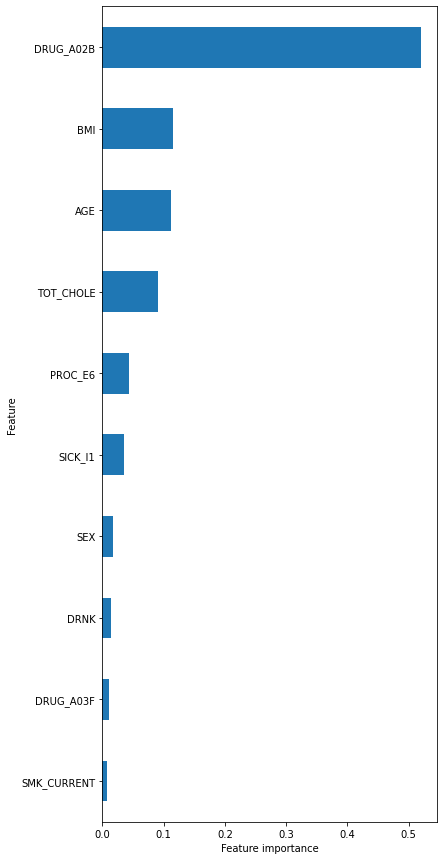

In [ ]:
feature_importance = GBM.feature_importances_
GB_VIP = pd.DataFrame(feature_importance, index=X_test.columns)
GB_VIP30 = GB_VIP.sort_values(by=[0], axis=0).tail(10)
print(GB_VIP30)

plt.figure(figsize=(6,15))
GB_VIP30[0].plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
results = pd.DataFrame({'Accuracy' : acc,
                        'Precision' : pre,
                        'Recall' : rec,
                        'F1' : f1}, index = ['LR', 'LR_wt', 'KNN', 'SVM', 'SVM_wt',
                                             'Dtree', 'Dtree_wt', 'RF', 'RF_wt', 'GB', 'GB_wt'])
display(results)

,Accuracy,Precision,Recall,F1
LR,0.881960,0.204082,0.416667,0.273973
LR_wt,0.714922,0.908163,0.264881,0.410138
KNN,0.879733,0.193878,0.395833,0.260274
SVM,0.889755,0.020408,0.400000,0.038835
SVM_wt,0.661470,1.000000,0.243781,0.392000
Dtree,0.841871,0.336735,0.300000,0.317308
Dtree_wt,0.848552,0.357143,0.324074,0.339806
RF,0.871938,0.234694,0.365079,0.285714
RF_wt,0.877506,0.234694,0.396552,0.294872
GB,0.877506,0.306122,0.416667,0.352941


In [ ]:
# 결과 저장
results.to_csv('./Results_AllModel.csv')

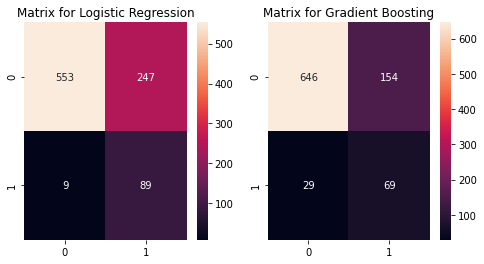

In [ ]:
# confusion_matrix(predLR2, y_test, labels=[0,1])

f,ax=plt.subplots(1,2,figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, predLR2, labels=[0,1]),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Matrix for Logistic Regression')

sns.heatmap(confusion_matrix(y_test, predGBM, labels=[0,1]),ax=ax[1],annot=True,fmt='2.0f')
ax[1].set_title('Matrix for Gradient Boosting')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()  

### 주요 변수들 (20개)

In [ ]:
I_var = GB_VIP.sort_values(by=[0], axis=0).tail(20).index

X2 = pop2[I_var]
print(X2.shape)
display(X2.head())

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state=1)
print(X_train2.shape)
print(X_test2.shape)


(2991, 20)


,DRUG_J01D,DRUG_N05B,SICK_K2,MedicalAID,DRUG_R05C,PROC_B0,DRUG_R06A,INCOMELOWER,SMK_PAST,SICK_J0,SMK_CURRENT,DRUG_A03F,DRNK,SEX,SICK_I1,PROC_E6,TOT_CHOLE,AGE,BMI,DRUG_A02B
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.138790,1.000000,0.233622,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0.405694,1.000000,0.140297,0
2,1,1,1,0,1,1,1,0,0,1,0,1,0,2,1,1,0.619217,0.974359,0.300680,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0.594306,0.974359,0.302534,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0.181495,0.974359,0.189740,0


(2093, 20)
(898, 20)


In [ ]:
acc = []
pre = []
rec = []
f1 = []

# 1.1 Logistic Regression 
LR1 = LogisticRegression(penalty='l1', solver='liblinear')
LR1.fit(X_train2, y_train)
predLR1=LR1.predict(X_test2)

acc.append(metrics.accuracy_score(predLR1, y_test))
pre.append(metrics.precision_score(predLR1, y_test))
rec.append(metrics.recall_score(predLR1, y_test))
f1.append(metrics.f1_score(predLR1, y_test))

# 1.2 Logistic Regression 
LR2 = LogisticRegression(penalty='l1', solver='liblinear', class_weight=weight)
LR2.fit(X_train2, y_train)
predLR2=LR2.predict(X_test2)

acc.append(metrics.accuracy_score(predLR2, y_test))
pre.append(metrics.precision_score(predLR2, y_test))
rec.append(metrics.recall_score(predLR2, y_test))
f1.append(metrics.f1_score(predLR2, y_test))

# 2. KNN
KNN=KNeighborsClassifier(4)
KNN.fit(X_train2, y_train)
predKNN=KNN.predict(X_test2)

# 3.1. SVM
acc.append(metrics.accuracy_score(predKNN, y_test))
pre.append(metrics.precision_score(predKNN, y_test))
rec.append(metrics.recall_score(predKNN, y_test))
f1.append(metrics.f1_score(predKNN, y_test))

SVM1=svm.SVC(kernel='linear',C=1,gamma=0.1)
SVM1.fit(X_train2, y_train)
predSVM1=SVM1.predict(X_test2)

acc.append(metrics.accuracy_score(predSVM1, y_test))
pre.append(metrics.precision_score(predSVM1, y_test))
rec.append(metrics.recall_score(predSVM1, y_test))
f1.append(metrics.f1_score(predSVM1, y_test))

# 3.2. SVM weight
SVM2=svm.SVC(kernel='linear',C=1,gamma=0.1, class_weight=weight)
SVM2.fit(X_train2, y_train)
predSVM2=SVM2.predict(X_test2)

acc.append(metrics.accuracy_score(predSVM2, y_test))
pre.append(metrics.precision_score(predSVM2, y_test))
rec.append(metrics.recall_score(predSVM2, y_test))
f1.append(metrics.f1_score(predSVM2, y_test))

# 4 Decision Tree
DTree1= DecisionTreeClassifier(random_state=0, class_weight="balanced")
DTree1.fit(X_train2, y_train)
predDTree1=DTree1.predict(X_test2)

acc.append(metrics.accuracy_score(predDTree1, y_test))
pre.append(metrics.precision_score(predDTree1, y_test))
rec.append(metrics.recall_score(predDTree1, y_test))
f1.append(metrics.f1_score(predDTree1, y_test))

# 4.2 Decision Tree weight
DTree2 = DecisionTreeClassifier(random_state=0, class_weight=weight)
DTree2.fit(X_train2, y_train)
predDTree2=DTree2.predict(X_test2)

acc.append(metrics.accuracy_score(predDTree2, y_test))
pre.append(metrics.precision_score(predDTree2, y_test))
rec.append(metrics.recall_score(predDTree2, y_test))
f1.append(metrics.f1_score(predDTree2, y_test))

# 5.1. Random Forest
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
RF1= RandomForestClassifier(n_estimators=500, random_state=0)  
RF1.fit(X_train2, y_train)
predRF1=RF1.predict(X_test2)

acc.append(metrics.accuracy_score(predRF1, y_test))
pre.append(metrics.precision_score(predRF1, y_test))
rec.append(metrics.recall_score(predRF1, y_test))
f1.append(metrics.f1_score(predRF1, y_test))

# 5.2. Rnadom Forest weight
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
RF2= RandomForestClassifier(n_estimators=500, random_state=0, class_weight=weight)  
RF2.fit(X_train2, y_train)
predRF2=RF2.predict(X_test2)

acc.append(metrics.accuracy_score(predRF2, y_test))
pre.append(metrics.precision_score(predRF2, y_test))
rec.append(metrics.recall_score(predRF2, y_test))
f1.append(metrics.f1_score(predRF2, y_test))

# 6.1 GBM
GBM= GradientBoostingClassifier(random_state=0, max_depth= 5, n_estimators=500, learning_rate = 0.08)
GBM.fit(X_train2, y_train)
predGBM=GBM.predict(X_test2)

acc.append(metrics.accuracy_score(predGBM, y_test))
pre.append(metrics.precision_score(predGBM, y_test))
rec.append(metrics.recall_score(predGBM, y_test))
f1.append(metrics.f1_score(predGBM, y_test))

# 6.2. GBM
GBM= GradientBoostingClassifier(random_state=0, max_depth= 5, n_estimators=500, learning_rate = 0.02)
GBM.fit(X_train2, y_train, sample_weight = sample_wt)
predGBM=GBM.predict(X_test2)

acc.append(metrics.accuracy_score(predGBM, y_test))
pre.append(metrics.precision_score(predGBM, y_test))
rec.append(metrics.recall_score(predGBM, y_test))
f1.append(metrics.f1_score(predGBM, y_test))

In [ ]:
results = pd.DataFrame({'Accuracy' : acc,
                        'Precision' : pre,
                        'Recall' : rec,
                        'F1' : f1}, index = ['LR', 'LR_wt', 'KNN', 'SVM', 'SVM_wt',
                                             'Dtree', 'Dtree_wt', 'RF', 'RF_wt', 'GB', 'GB_wt'])
display(results)

,Accuracy,Precision,Recall,F1
LR,0.880846,0.204082,0.408163,0.272109
LR_wt,0.714922,0.908163,0.264881,0.410138
KNN,0.881960,0.193878,0.413043,0.263889
SVM,0.889755,0.020408,0.400000,0.038835
SVM_wt,0.661470,1.000000,0.243781,0.392000
Dtree,0.850780,0.295918,0.308511,0.302083
Dtree_wt,0.853007,0.346939,0.333333,0.340000
RF,0.881960,0.255102,0.431034,0.320513
RF_wt,0.876392,0.234694,0.389831,0.292994
GB,0.879733,0.265306,0.419355,0.325000


In [ ]:
results.to_csv("./20variableResults.csv")

### 주요변수들 (10개)

In [ ]:
I_var = GB_VIP.sort_values(by=[0], axis=0).tail(10).index

X3 = pop2[I_var]
print(X3.shape)
display(X3.head())

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train3, X_test3, y_train, y_test = train_test_split(X3, y, test_size = 0.3, random_state=1)
print(X_train3.shape)
print(X_test3.shape)

(2991, 10)


,SMK_CURRENT,DRUG_A03F,DRNK,SEX,SICK_I1,PROC_E6,TOT_CHOLE,AGE,BMI,DRUG_A02B
0,0,0,0,1,0,0,0.138790,1.000000,0.233622,0
1,0,0,0,2,0,0,0.405694,1.000000,0.140297,0
2,0,1,0,2,1,1,0.619217,0.974359,0.300680,1
3,0,0,0,2,0,0,0.594306,0.974359,0.302534,0
4,0,0,0,2,0,0,0.181495,0.974359,0.189740,0


(2093, 10)
(898, 10)


In [ ]:
acc = []
pre = []
rec = []
f1 = []

# 1.1 Logistic Regression 
LR1 = LogisticRegression(penalty='l1', solver='liblinear')
LR1.fit(X_train3, y_train)
predLR1=LR1.predict(X_test3)

acc.append(metrics.accuracy_score(predLR1, y_test))
pre.append(metrics.precision_score(predLR1, y_test))
rec.append(metrics.recall_score(predLR1, y_test))
f1.append(metrics.f1_score(predLR1, y_test))

# 1.2 Logistic Regression 
LR2 = LogisticRegression(penalty='l1', solver='liblinear', class_weight=weight)
LR2.fit(X_train3, y_train)
predLR2=LR2.predict(X_test3)

acc.append(metrics.accuracy_score(predLR2, y_test))
pre.append(metrics.precision_score(predLR2, y_test))
rec.append(metrics.recall_score(predLR2, y_test))
f1.append(metrics.f1_score(predLR2, y_test))

# 2. KNN
KNN=KNeighborsClassifier(4)
KNN.fit(X_train3, y_train)
predKNN=KNN.predict(X_test3)

# 3.1. SVM
acc.append(metrics.accuracy_score(predKNN, y_test))
pre.append(metrics.precision_score(predKNN, y_test))
rec.append(metrics.recall_score(predKNN, y_test))
f1.append(metrics.f1_score(predKNN, y_test))

SVM1=svm.SVC(kernel='linear',C=1,gamma=0.1)
SVM1.fit(X_train3, y_train)
predSVM1=SVM1.predict(X_test3)

acc.append(metrics.accuracy_score(predSVM1, y_test))
pre.append(metrics.precision_score(predSVM1, y_test))
rec.append(metrics.recall_score(predSVM1, y_test))
f1.append(metrics.f1_score(predSVM1, y_test))

# 3.2. SVM weight
SVM2=svm.SVC(kernel='linear',C=1,gamma=0.1, class_weight=weight)
SVM2.fit(X_train3, y_train)
predSVM2=SVM2.predict(X_test3)

acc.append(metrics.accuracy_score(predSVM2, y_test))
pre.append(metrics.precision_score(predSVM2, y_test))
rec.append(metrics.recall_score(predSVM2, y_test))
f1.append(metrics.f1_score(predSVM2, y_test))

# 4 Decision Tree
DTree1= DecisionTreeClassifier(random_state=0, class_weight="balanced")
DTree1.fit(X_train3, y_train)
predDTree1=DTree1.predict(X_test3)

acc.append(metrics.accuracy_score(predDTree1, y_test))
pre.append(metrics.precision_score(predDTree1, y_test))
rec.append(metrics.recall_score(predDTree1, y_test))
f1.append(metrics.f1_score(predDTree1, y_test))

# 4.2 Decision Tree weight
DTree2 = DecisionTreeClassifier(random_state=0, class_weight=weight)
DTree2.fit(X_train3, y_train)
predDTree2=DTree2.predict(X_test3)

acc.append(metrics.accuracy_score(predDTree2, y_test))
pre.append(metrics.precision_score(predDTree2, y_test))
rec.append(metrics.recall_score(predDTree2, y_test))
f1.append(metrics.f1_score(predDTree2, y_test))

# 5.1. Random Forest
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
RF1= RandomForestClassifier(n_estimators=500, random_state=0)  
RF1.fit(X_train3, y_train)
predRF1=RF1.predict(X_test3)

acc.append(metrics.accuracy_score(predRF1, y_test))
pre.append(metrics.precision_score(predRF1, y_test))
rec.append(metrics.recall_score(predRF1, y_test))
f1.append(metrics.f1_score(predRF1, y_test))

# 5.2. Rnadom Forest weight
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
RF2= RandomForestClassifier(n_estimators=500, random_state=0, class_weight=weight)  
RF2.fit(X_train3, y_train)
predRF2=RF2.predict(X_test3)

acc.append(metrics.accuracy_score(predRF2, y_test))
pre.append(metrics.precision_score(predRF2, y_test))
rec.append(metrics.recall_score(predRF2, y_test))
f1.append(metrics.f1_score(predRF2, y_test))

# 6.1 GBM
GBM= GradientBoostingClassifier(random_state=0, max_depth= 5, n_estimators=500, learning_rate = 0.08)
GBM.fit(X_train3, y_train)
predGBM=GBM.predict(X_test3)

acc.append(metrics.accuracy_score(predGBM, y_test))
pre.append(metrics.precision_score(predGBM, y_test))
rec.append(metrics.recall_score(predGBM, y_test))
f1.append(metrics.f1_score(predGBM, y_test))

# 6.2. GBM
GBM= GradientBoostingClassifier(random_state=0, max_depth= 5, n_estimators=500, learning_rate = 0.02)
GBM.fit(X_train3, y_train, sample_weight = sample_wt)
predGBM=GBM.predict(X_test3)

acc.append(metrics.accuracy_score(predGBM, y_test))
pre.append(metrics.precision_score(predGBM, y_test))
rec.append(metrics.recall_score(predGBM, y_test))
f1.append(metrics.f1_score(predGBM, y_test))

In [ ]:
results = pd.DataFrame({'Accuracy' : acc,
                        'Precision' : pre,
                        'Recall' : rec,
                        'F1' : f1}, index = ['LR', 'LR_wt', 'KNN', 'SVM', 'SVM_wt',
                                             'Dtree', 'Dtree_wt', 'RF', 'RF_wt', 'GB', 'GB_wt'])
display(results)

,Accuracy,Precision,Recall,F1
LR,0.880846,0.193878,0.404255,0.262069
LR_wt,0.713808,0.908163,0.264095,0.409195
KNN,0.881960,0.193878,0.413043,0.263889
SVM,0.890869,0.000000,0.000000,0.000000
SVM_wt,0.660356,1.000000,0.243176,0.391218
Dtree,0.854120,0.367347,0.342857,0.354680
Dtree_wt,0.851893,0.357143,0.333333,0.344828
RF,0.878619,0.244898,0.406780,0.305732
RF_wt,0.877506,0.204082,0.384615,0.266667
GB,0.876392,0.275510,0.402985,0.327273


In [ ]:
results.to_csv("./10variableResults.csv")